In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

<aside>
    <p><i class="fas fa-exclamation-circle"></i> <b>Note</b> : La colonne <b>"SalePrice"</b> a été supprimée des données d'entraînement avant de les combiner avec les données de test. Cela est fait car lors de l'entraînement d'un modèle de machine learning pour prédire une variable cible (dans ce cas, "SalePrice"), il est essentiel de ne pas inclure cette variable dans les données d'entrée du modèle. Cela garantit que le modèle apprend à partir des autres caractéristiques des données et qu'il ne se contente pas de mémoriser les valeurs de la variable cible. Ainsi, en supprimant "SalePrice" des données d'entraînement, on s'assure que le modèle apprend de manière appropriée à partir des données fournies.</p>
</aside>


<i class="fas fa-file-import"  style="color: #8B0000; font-size: 16px; margin-right: 5px;"> importation des sources de données 

In [13]:
#Nous avons concaténé les deux sources test et train pour faire les prétraitement sur les deux en une seule etape
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

combined_data = pd.concat([train.drop(columns=['SalePrice']), test])

In [14]:
pd.set_option('display.max_columns', None) # to display all columns
combined_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [15]:
train.iloc[1458]

Id                 1459
MSSubClass           20
MSZoning             RL
LotFrontage        68.0
LotArea            9717
                  ...  
MoSold                4
YrSold             2010
SaleType             WD
SaleCondition    Normal
SalePrice        142125
Name: 1458, Length: 81, dtype: object

In [16]:
print('Shape of train and test data')
print(f'In train dataset there are {combined_data.shape[0]} rows and {combined_data.shape[1]} columns')


Shape of train and test data
In train dataset there are 2919 rows and 80 columns


In [17]:
# Vérifier les doublons des deux df concaténés 
doublons = combined_data.duplicated()

# Afficher les doublons
print("Doublons dans le DataFrame :")
print(doublons)

# Afficher les lignes qui sont des doublons
print("\nLignes doublons :")
print(combined_data[doublons])

Doublons dans le DataFrame :
0       False
1       False
2       False
3       False
4       False
        ...  
1454    False
1455    False
1456    False
1457    False
1458    False
Length: 2919, dtype: bool

Lignes doublons :
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQua

In [18]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [19]:
print('Statical description  of combined_data')
combined_data.describe()

Statical description  of combined_data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [20]:
#on affiche le nombre de valeurs manquantes pour chaque colonne 
print('les valeurs manquantes des deux dataframes test & train')
combined_data.isnull().sum().sort_values(ascending=False).head(35)

les valeurs manquantes des deux dataframes test & train


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
GarageCars         1
KitchenQual        1
BsmtFinSF1         1
SaleType           1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
KitchenAbvGr       0
dtype: int64

In [21]:
def observer(df, threshold=5):  # Ajout d'un paramètre threshold avec une valeur par défaut de 5%
    size = df.shape
    nanvalues = df.isna().sum()
 
    nanvalues_percent = nanvalues * 100 / size[0]
    nanvalues_percent = nanvalues_percent.sort_values(ascending=True)
 
    # Sélectionnez seulement les colonnes avec un taux de valeurs manquantes supérieur au seuil
    nanvalues_selected = nanvalues_percent[nanvalues_percent > threshold]
 
    ax = nanvalues_selected.plot(kind='barh',
                                 figsize=(8, 6),  # Ajustez la taille du graphique selon vos préférences
                                 color='#000000',
                                 zorder=2,
                                 width=0.85)
 
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
 
    ax.tick_params(axis="both",
                   which="both",
                   bottom="off",
                   top="off",
                   labelbottom="on",
                   left="off",
                   right="off",
                   labelleft="on")
    ax.set_title(f"Taux de valeurs manquantes pour les colonnes du dataframe df (seuil = {threshold}%)")
    vals = ax.get_xticks()
 
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='blue', zorder=1)

In [22]:
# Affichage des colonnes avec des valeurs nulles
colonnes_avec_nuls = combined_data.columns[combined_data.isnull().any()].tolist()
#print("Colonnes avec des valeurs nulles : ", colonnes_avec_nuls)
for colonne in colonnes_avec_nuls:
    nombre_nuls = combined_data[colonne].isnull().sum()
    print(f"Colonne '{colonne}'--> {nombre_nuls} valeurs nulles.")

Colonne 'MSZoning'--> 4 valeurs nulles.
Colonne 'LotFrontage'--> 486 valeurs nulles.
Colonne 'Alley'--> 2721 valeurs nulles.
Colonne 'Utilities'--> 2 valeurs nulles.
Colonne 'Exterior1st'--> 1 valeurs nulles.
Colonne 'Exterior2nd'--> 1 valeurs nulles.
Colonne 'MasVnrType'--> 24 valeurs nulles.
Colonne 'MasVnrArea'--> 23 valeurs nulles.
Colonne 'BsmtQual'--> 81 valeurs nulles.
Colonne 'BsmtCond'--> 82 valeurs nulles.
Colonne 'BsmtExposure'--> 82 valeurs nulles.
Colonne 'BsmtFinType1'--> 79 valeurs nulles.
Colonne 'BsmtFinSF1'--> 1 valeurs nulles.
Colonne 'BsmtFinType2'--> 80 valeurs nulles.
Colonne 'BsmtFinSF2'--> 1 valeurs nulles.
Colonne 'BsmtUnfSF'--> 1 valeurs nulles.
Colonne 'TotalBsmtSF'--> 1 valeurs nulles.
Colonne 'Electrical'--> 1 valeurs nulles.
Colonne 'BsmtFullBath'--> 2 valeurs nulles.
Colonne 'BsmtHalfBath'--> 2 valeurs nulles.
Colonne 'KitchenQual'--> 1 valeurs nulles.
Colonne 'Functional'--> 2 valeurs nulles.
Colonne 'FireplaceQu'--> 1420 valeurs nulles.
Colonne 'GarageT

In [23]:
#on divise notre df en deux df selon le type des colonnes à savoir colonnes catégorielles & numériques 
#une etape pour faciliter notre prétraitement .
print('Numerical and cetegorical features in  data')
object_df = combined_data.select_dtypes(include=['object'])
numerical_df =combined_data.select_dtypes(exclude=['object'])

#datatype
print(object_df.dtypes)

Numerical and cetegorical features in  data
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            obj

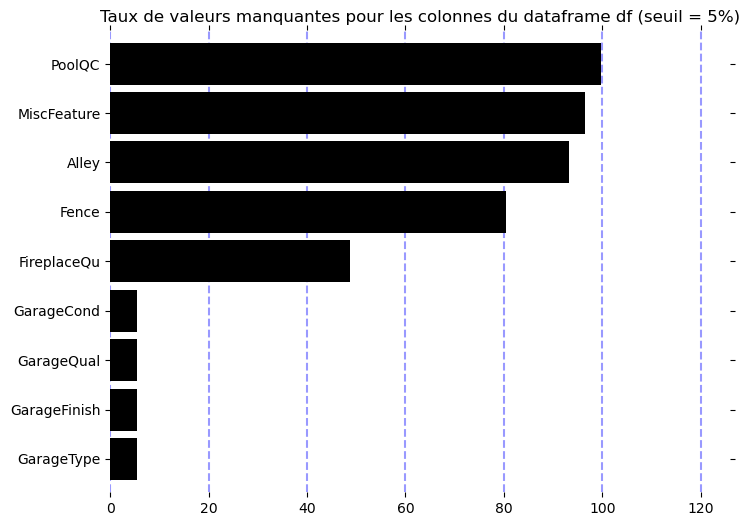

In [24]:
observer(object_df,5)

In [25]:
print('Numerical features in data')
print(numerical_df.dtypes)

Numerical features in data
Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object


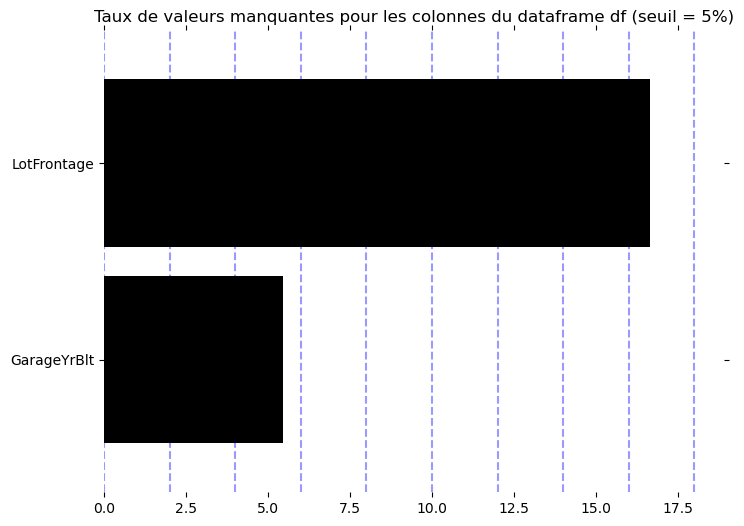

In [26]:
observer(numerical_df,5)

In [27]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_df[columns_None]= object_df[columns_None].fillna('None')

In [28]:
columns_with_lownullvalues = ['MSZoning','Utilities','Exterior1st','Exterior2nd','Electrical','KitchenQual','Functional','SaleType']
#fill missing values for each column (using its own most frequent value)
object_df[columns_with_lownullvalues] = object_df[columns_with_lownullvalues].fillna(object_df.mode().iloc[0])

In [29]:
print('After Treating Missing values in data')
object_df.isnull().sum().sort_values(ascending=False).head(10)
object_df

After Treating Missing values in data


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,None,None,None,None,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,None,None,None,None,Y,NaN,MnPrv,Shed,WD,Normal


In [30]:
print('Numerical features in data')
#Number of null values in each feature
NUll_val = numerical_df.isnull().sum().sort_values(ascending=False)
NUll_val.head(20)

Numerical features in data


LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
dtype: int64

In [31]:
print((numerical_df['YrSold']-numerical_df['YearBuilt']).median())
print(numerical_df["LotFrontage"].median())

35.0
68.0


In [32]:
numerical_df['GarageYrBlt'] = numerical_df['GarageYrBlt'].fillna(numerical_df['YrSold']-35)
numerical_df['LotFrontage'] = numerical_df['LotFrontage'].fillna(68)

In [33]:
numerical_df= numerical_df.fillna(0)

In [34]:
numerical_df.isnull().sum().sort_values(ascending=False).head(10)

Id              0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
dtype: int64

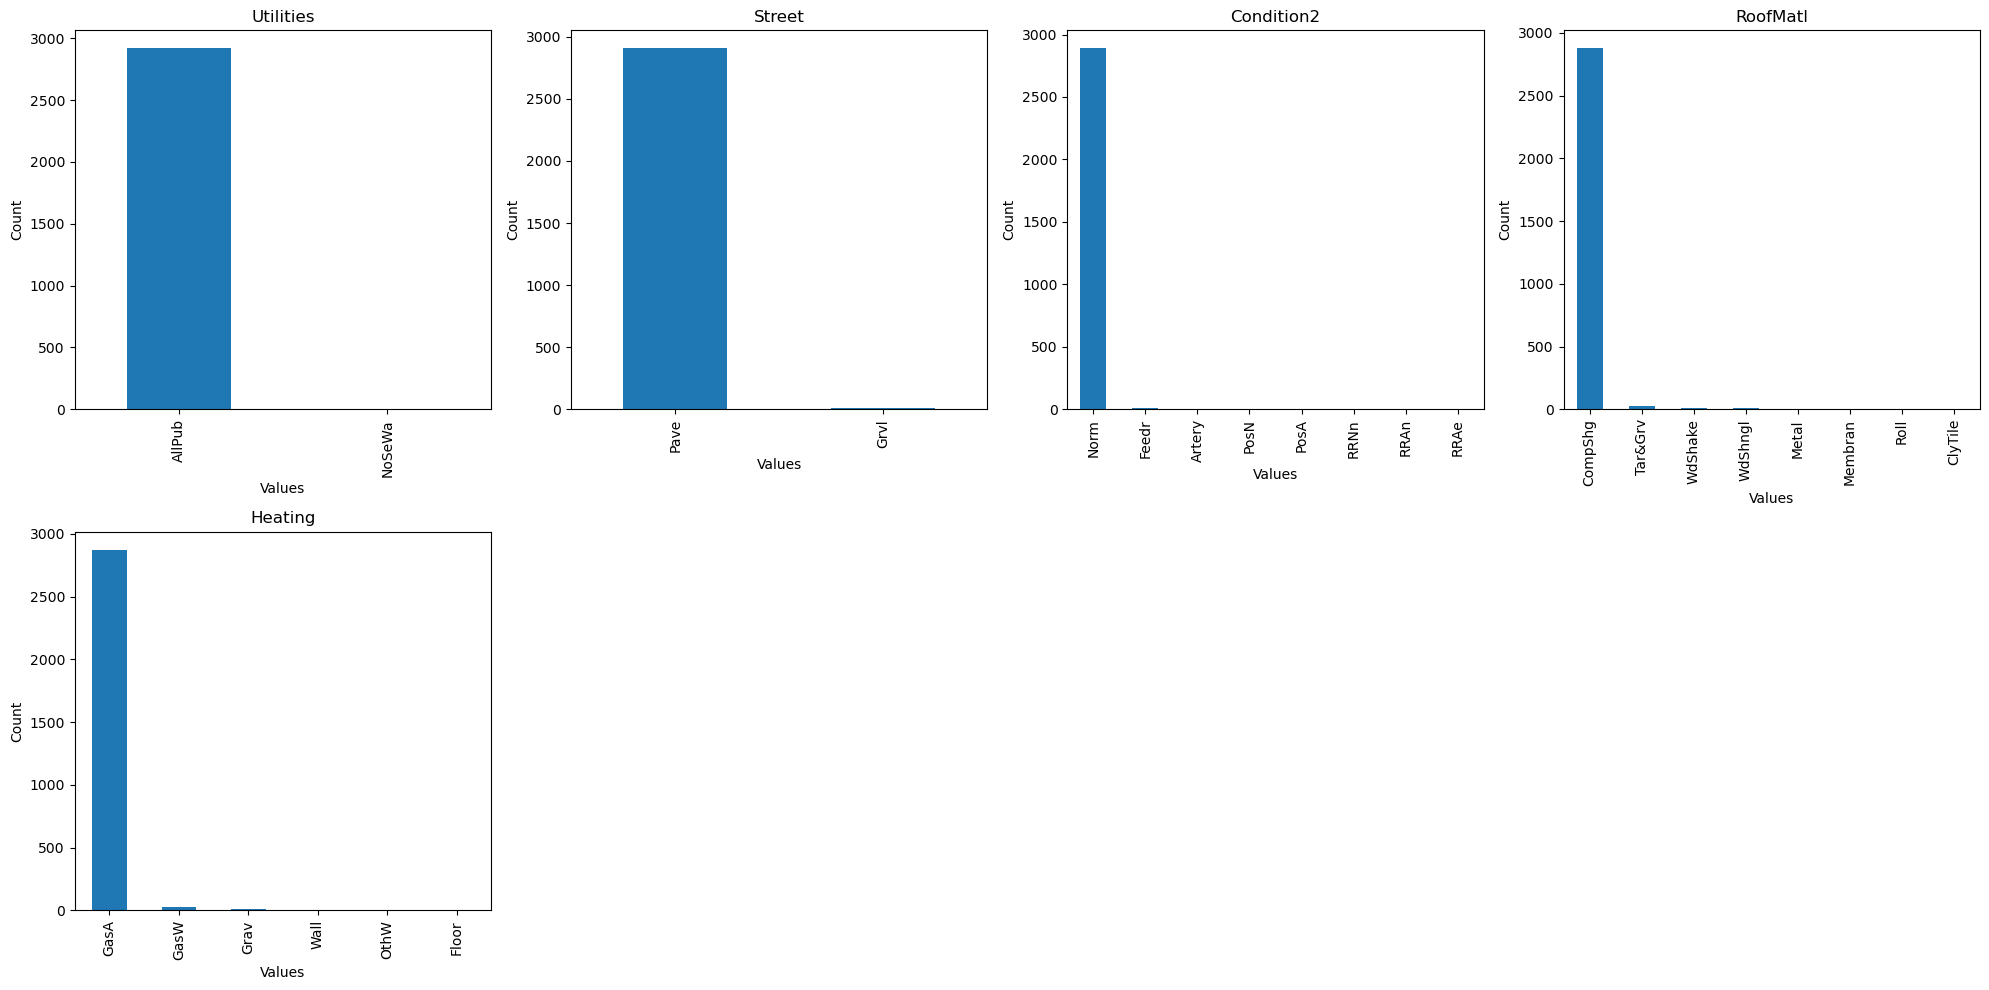

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots for bar plots
plt.figure(figsize=[20, 10])

# Plot and display value counts for 'Utilities'
plt.subplot(2, 4, 1)
object_df['Utilities'].value_counts().plot(kind='bar')
plt.title('Utilities')
plt.xlabel('Values')
plt.ylabel('Count')

plt.subplot(2, 4, 2)
object_df['Street'].value_counts().plot(kind='bar')
plt.title('Street')
plt.xlabel('Values')
plt.ylabel('Count')

plt.subplot(2, 4, 3)
object_df['Condition2'].value_counts().plot(kind='bar')
plt.title('Condition2')
plt.xlabel('Values')
plt.ylabel('Count')

plt.subplot(2, 4, 4)
object_df['RoofMatl'].value_counts().plot(kind='bar')
plt.title('RoofMatl')
plt.xlabel('Values')
plt.ylabel('Count')

plt.subplot(2, 4, 5)
object_df['Heating'].value_counts().plot(kind='bar')
plt.title('Heating')
plt.xlabel('Values')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [36]:
object_columns_df = object_df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [37]:
numerical_df['Age_House']= (numerical_df['YrSold']-numerical_df['YearBuilt'])
numerical_df['Age_House'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [38]:
Negatif = numerical_df[numerical_df['Age_House'] < 0]
Negatif

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House
1089,2550,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,0.0,1085.0,5095.0,5095,0,0,5095,1.0,1.0,2,1,2,1,15,2,2008.0,3.0,1154.0,546,484,0,0,0,0,17000,10,2007,-1


In [39]:
numerical_df.loc[numerical_df['YrSold'] < numerical_df['YearBuilt'],'YrSold' ] = 2009
numerical_df['Age_House']= (numerical_df['YrSold']-numerical_df['YearBuilt'])
numerical_df['Age_House'].describe()

count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [40]:
numerical_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,5
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,31
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,7
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,91
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,8



>Ce code effectue la standardisation des données en utilisant une correspondance entre les valeurs catégorielles et des valeurs numériques. Il utilise un dictionnaire bin_map pour mapper les valeurs catégorielles à des nombres. Ensuite, il applique ces mappages à plusieurs colonnes du DataFrame object_columns_df. Enfin, il utilise un autre dictionnaire PavedDrive pour mapper les valeurs de la colonne 'PavedDrive' à des nombres.

In [41]:
#standarisation
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
           }
object_columns_df['ExterQual'] = object_columns_df['ExterQual'].map(bin_map)
object_columns_df['ExterCond'] = object_columns_df['ExterCond'].map(bin_map)
object_columns_df['BsmtCond'] = object_columns_df['BsmtCond'].map(bin_map)
object_columns_df['BsmtQual'] = object_columns_df['BsmtQual'].map(bin_map)
object_columns_df['HeatingQC'] = object_columns_df['HeatingQC'].map(bin_map)
object_columns_df['KitchenQual'] = object_columns_df['KitchenQual'].map(bin_map)
object_columns_df['FireplaceQu'] = object_columns_df['FireplaceQu'].map(bin_map)
object_columns_df['GarageQual'] = object_columns_df['GarageQual'].map(bin_map)
object_columns_df['GarageCond'] = object_columns_df['GarageCond'].map(bin_map)
object_columns_df['CentralAir'] = object_columns_df['CentralAir'].map(bin_map)
object_columns_df['LotShape'] = object_columns_df['LotShape'].map(bin_map)
object_columns_df['BsmtExposure'] = object_columns_df['BsmtExposure'].map(bin_map)
object_columns_df['BsmtFinType1'] = object_columns_df['BsmtFinType1'].map(bin_map)
object_columns_df['BsmtFinType2'] = object_columns_df['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_df['PavedDrive'] = object_columns_df['PavedDrive'].map(PavedDrive)

In [42]:
#Select categorical features
rest_object_columns = object_columns_df.select_dtypes(include=['object'])
#Using One hot encoder
object_df = pd.get_dummies(object_columns_df, columns=rest_object_columns.columns)

In [43]:
object_df.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageQual,GarageCond,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4,2,2,6,1,4,1,4,0,2,2,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3,2,2,4,2,4,5,1,4,1,2,2,2,2,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,4,2,4,2,2,6,1,4,1,4,2,2,2,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0

In [44]:
df_final = pd.concat([object_df, numerical_df], axis=1,sort=False)
df_final.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageQual,GarageCond,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House
0,3,4,2,4,2,2,6,1,4,1,4,0,2,2,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,5
1,3,2,2,4,2,4,5,1,4,1,2,2,2,2,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0

In [45]:
#on split a nouveau pour déstinguer entre les données test et celles de train
train_length = len(train)

# Split df_final into training and test sets
df_final_train = df_final[:train_length]
df_final_test = df_final[train_length:]
#Rajouter la colonne SalePrice 
df_final_train = pd.merge(df_final_train, train[['Id', 'SalePrice']], on='Id', how='left')

print("Size of df_final_train:", df_final_train.shape)
print("Size of df_final_test:", df_final_test.shape)

Size of df_final_train: (1460, 216)
Size of df_final_test: (1459, 215)


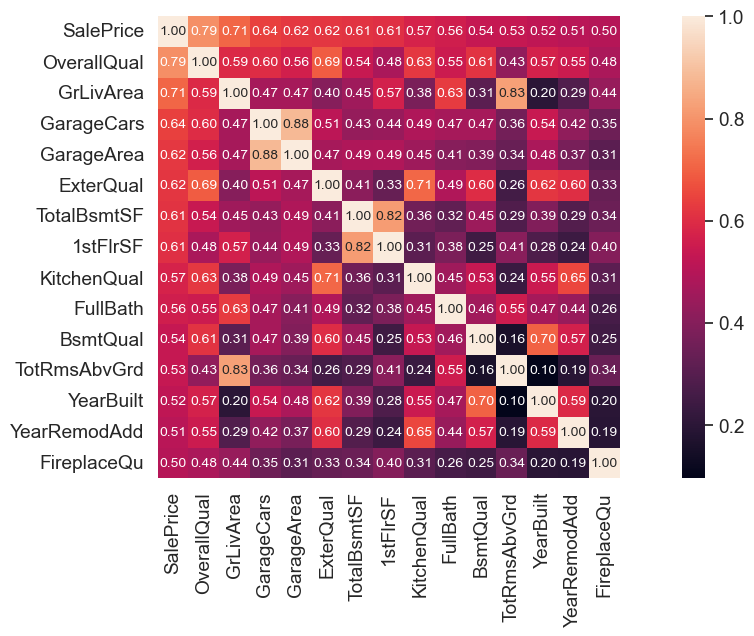

In [46]:
#ce visuel nous montre les 15 features qui ont plus d'impact sur la variable cible prix de vente 
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,6))
corrmat = df_final_train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_final_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Prédiction 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb

# remove warnings
import warnings
warnings.filterwarnings('ignore')

<aside>
    <p><i class="fas fa-exclamation-circle"></i> <b>Note</b> Dans ce code, nous effectuons plusieurs étapes pour entraîner un modèle de régression RandomForestRegressor. Tout d'abord, nous remplaçons les valeurs nulles dans le dataframe X par zéro, assurant ainsi la cohérence des données. Ensuite, nous convertissons les variables catégorielles en variables indicatrices (dummy variables) à l'aide de la méthode pd.get_dummies(), ce qui nous permet de traiter les données catégoriques de manière appropriée. Ensuite, nous créons le modèle RandomForestRegressor et l'entraînons sur les données d'entrée X ainsi que sur la variable cible Y. Après l'entraînement du modèle, nous obtenons l'importance des caractéristiques à l'aide de la méthode feature_importances_, ce qui nous permet de comprendre quelles caractéristiques ont le plus d'impact sur les prédictions du modèle. Enfin, nous affichons les caractéristiques les plus importantes avec leurs valeurs d'importance, ce qui fournit des informations utiles pour interpréter les résultats du modèle et pour sélectionner les caractéristiques les plus pertinentes pour la prédiction.</p></aside>

In [48]:
Y= df_final_train['SalePrice']
X = df_final_train.drop(['SalePrice'],axis=1)

In [49]:
# Remplacez les valeurs nulles dans le reste du DataFrame
X.fillna(0, inplace=True)
 
# Convertissez les variables catégorielles en variables indicatrices (dummies)
X = pd.get_dummies(X)
 
# Créez un modèle RandomForestRegressor
model = RandomForestRegressor()
 
# Entraînez le modèle sur vos données
model.fit(X, Y)
 
# Obtenez l'importance des caractéristiques
feature_importances = model.feature_importances_
 
# Créez un DataFrame pour afficher l'importance des caractéristiques
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
 
# Triez le DataFrame par importance décroissante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
 
# Affichez les caractéristiques les plus importantes
print(feature_importance_df.head())

         Feature  Importance
181  OverallQual    0.576799
193    GrLivArea    0.108286
189  TotalBsmtSF    0.036018
191     2ndFlrSF    0.034216
186   BsmtFinSF1    0.028452


## Diviser les données en ensembles d'entraînement et de validation

In [50]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2,random_state=0)

## Prédection avec XGBoost

In [51]:
# Create DMatrix for training and validation data
dtrain = xgb.DMatrix(X_train, label=Y_train)
dval = xgb.DMatrix(X_val, label=Y_val)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10
}

# Train the XGBoost model
model_xgboost = xgb.train(params, dtrain, num_boost_round=500)

# Predict on the validation data
xgboost_val_predictions = model_xgboost.predict(dval)

# Evaluate the performance of the XGBoost model on validation data
rmse_xgboost = mean_squared_error(Y_val, xgboost_val_predictions, squared=False)

# Print evaluation metrics for the XGBoost model
print("XGBoost - Root Mean Squared Error (RMSE):", rmse_xgboost)

# Now, you can use the XGBoost model to make predictions on your test data
dtest = xgb.DMatrix(df_final_test)  # Assuming df_final_test is your test data
xgboost_test_predictions = model_xgboost.predict(dtest)

# Create a DataFrame with Id and SalePrice columns from your test data and XGBoost predictions
df_predictions_xgboost = pd.DataFrame({'Id': df_final_test['Id'], 'SalePrice': xgboost_test_predictions})

# Save the DataFrame to a CSV file
df_predictions_xgboost.to_csv('predictions_xgboost.csv', index=False)

print("XGBoost predictions saved to 'predictions_xgboost.csv'.")

XGBoost - Root Mean Squared Error (RMSE): 28757.864760319855
XGBoost predictions saved to 'predictions_xgboost.csv'.


## Prédection avec RandomForestRegressor

In [52]:
# Create a RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)

# Train the model on the training data
regr.fit(X_train, Y_train)

# Make predictions on the validation data
random_forest_val_predictions = regr.predict(X_val)

# Evaluate the performance of the RandomForestRegressor on validation data
rmse_randomforest = mean_squared_error(Y_val, random_forest_val_predictions, squared=False)

# Print evaluation metrics for the RandomForestRegressor
print("RandomForestRegressor - Root Mean Squared Error (RMSE):", rmse_randomforest)

# Now, you can use the RandomForestRegressor model to make predictions on your test data
random_forest_test_predictions = regr.predict(df_final_test)  # Assuming df_final_test is your test data

# Create a DataFrame with Id and SalePrice columns from your test data and RandomForestRegressor predictions
df_predictions_randomforest = pd.DataFrame({'Id': df_final_test['Id'], 'SalePrice': random_forest_test_predictions})

# Save the DataFrame to a CSV file
df_predictions_randomforest.to_csv('predictions_randomforest.csv', index=False)

print("RandomForestRegressor predictions saved to 'predictions_randomforest.csv'.")

RandomForestRegressor - Root Mean Squared Error (RMSE): 47329.57425924896
RandomForestRegressor predictions saved to 'predictions_randomforest.csv'.


## Prédection avec LinearRegression

In [53]:
# Normaliser les données (facultatif mais souvent bénéfique pour la régression linéaire)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train_scaled, Y_train)

# Faire des prédictions sur l'ensemble de validation
predictions = model.predict(X_val_scaled)

# Évaluer la performance du modèle
mse = mean_squared_error(Y_val, predictions)
print(f'Mean Squared Error sur l\'ensemble de validation: {mse}')

# Maintenant, vous pouvez utiliser le modèle entraîné pour faire des prédictions sur vos données de test
df_final_test_scaled = scaler.transform(df_final_test)  # N'oubliez pas de normaliser vos données de test si vous avez normalisé les données d'entraînement
test_predictions = model.predict(df_final_test_scaled)

# Créer un DataFrame avec les colonnes "Id" et "SalePrice" à partir du DataFrame de test et des prédictions
df_predictions = pd.DataFrame({'Id': df_final_test['Id'], 'SalePrice': test_predictions})

# Enregistrer le DataFrame dans un fichier CSV
df_predictions.to_csv('predictions_linear_regression.csv', index=False)

print("Fichier CSV 'predictions.csv' créé avec succès.")

Mean Squared Error sur l'ensemble de validation: 2.56517597471034e+31
Fichier CSV 'predictions.csv' créé avec succès.


## Evaluation des 3 models

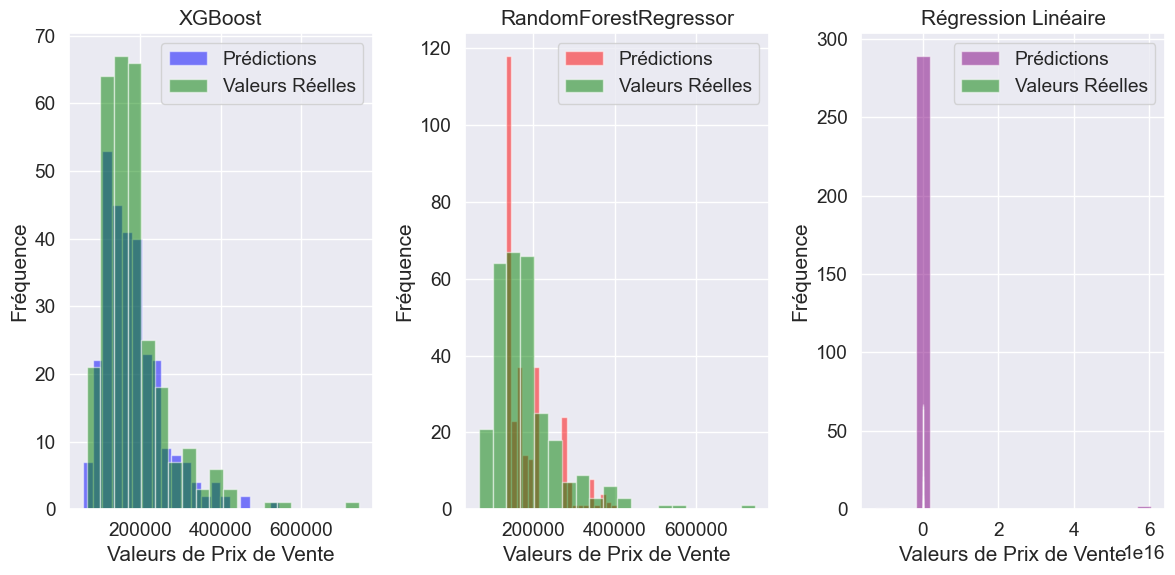

In [54]:
import matplotlib.pyplot as plt

# Collecter les valeurs prédites par chaque modèle sur l'ensemble de validation
predictions_xgboost = xgboost_val_predictions
predictions_randomforest = random_forest_val_predictions
predictions_linear_regression = predictions

# Collecter les valeurs réelles sur l'ensemble de validation
y_true = Y_val

# Tracer les histogrammes
plt.figure(figsize=(12, 6))

# Histogramme pour XGBoost
plt.subplot(1, 3, 1)
plt.hist(predictions_xgboost, bins=20, alpha=0.5, color='blue', label='Prédictions')
plt.hist(y_true, bins=20, alpha=0.5, color='green', label='Valeurs Réelles')
plt.title('XGBoost')
plt.xlabel('Valeurs de Prix de Vente')
plt.ylabel('Fréquence')
plt.legend()

# Histogramme pour RandomForestRegressor
plt.subplot(1, 3, 2)
plt.hist(predictions_randomforest, bins=20, alpha=0.5, color='red', label='Prédictions')
plt.hist(y_true, bins=20, alpha=0.5, color='green', label='Valeurs Réelles')
plt.title('RandomForestRegressor')
plt.xlabel('Valeurs de Prix de Vente')
plt.ylabel('Fréquence')
plt.legend()

# Histogramme pour Régression Linéaire
plt.subplot(1, 3, 3)
plt.hist(predictions_linear_regression, bins=20, alpha=0.5, color='purple', label='Prédictions')
plt.hist(y_true, bins=20, alpha=0.5, color='green', label='Valeurs Réelles')
plt.title('Régression Linéaire')
plt.xlabel('Valeurs de Prix de Vente')
plt.ylabel('Fréquence')
plt.legend()

plt.tight_layout()
plt.show()


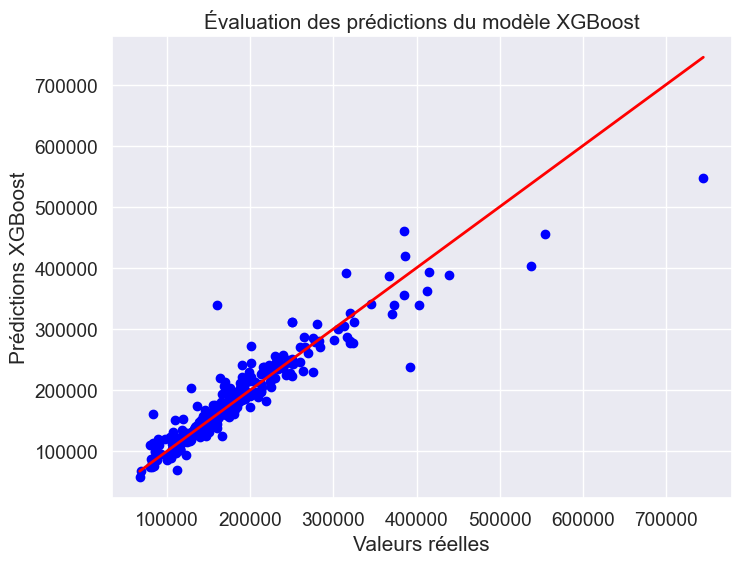

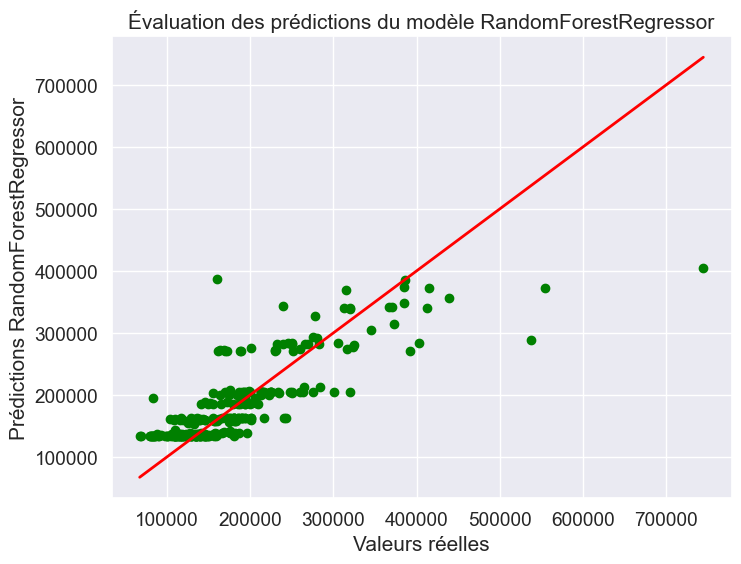

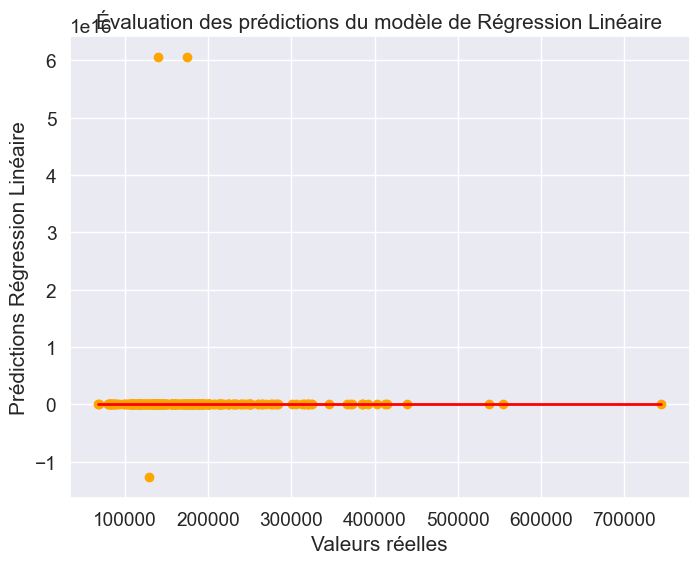

In [55]:
import matplotlib.pyplot as plt

# Évaluation du modèle XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(Y_val, xgboost_val_predictions, color='blue')
plt.plot([min(Y_val), max(Y_val)], [min(Y_val), max(Y_val)], color='red', linewidth=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions XGBoost")
plt.title("Évaluation des prédictions du modèle XGBoost")
plt.show()

# Évaluation du modèle RandomForestRegressor
plt.figure(figsize=(8, 6))
plt.scatter(Y_val, random_forest_val_predictions, color='green')
plt.plot([min(Y_val), max(Y_val)], [min(Y_val), max(Y_val)], color='red', linewidth=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions RandomForestRegressor")
plt.title("Évaluation des prédictions du modèle RandomForestRegressor")
plt.show()

# Évaluation du modèle de régression linéaire
plt.figure(figsize=(8, 6))
plt.scatter(Y_val, predictions, color='orange')
plt.plot([min(Y_val), max(Y_val)], [min(Y_val), max(Y_val)], color='red', linewidth=2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions Régression Linéaire")
plt.title("Évaluation des prédictions du modèle de Régression Linéaire")
plt.show()


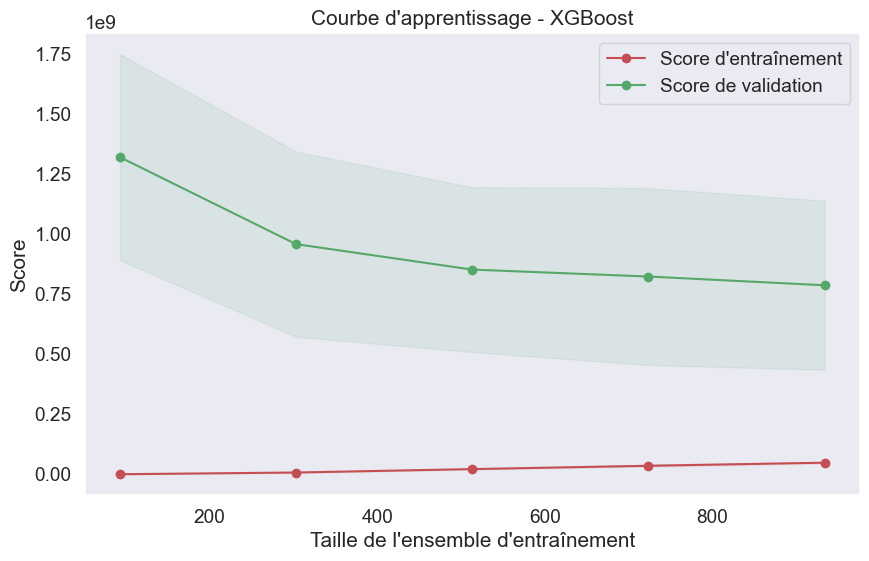

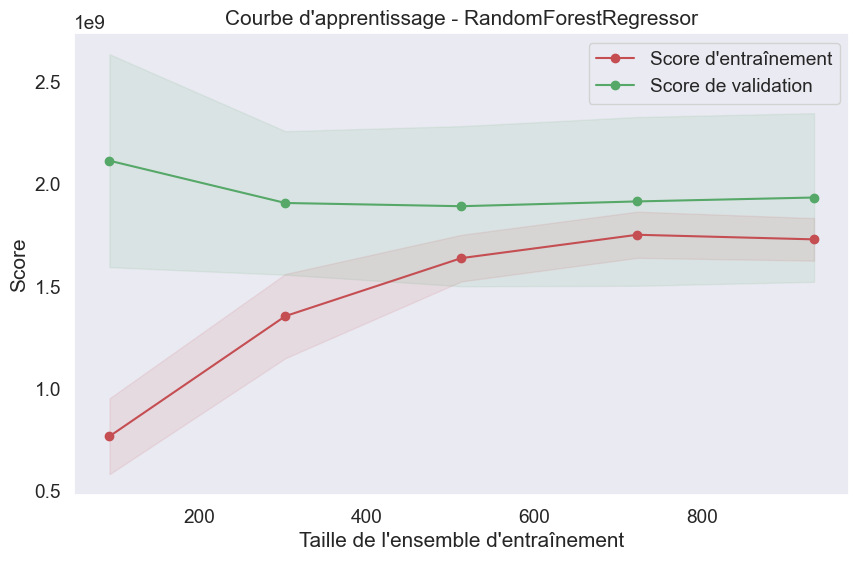

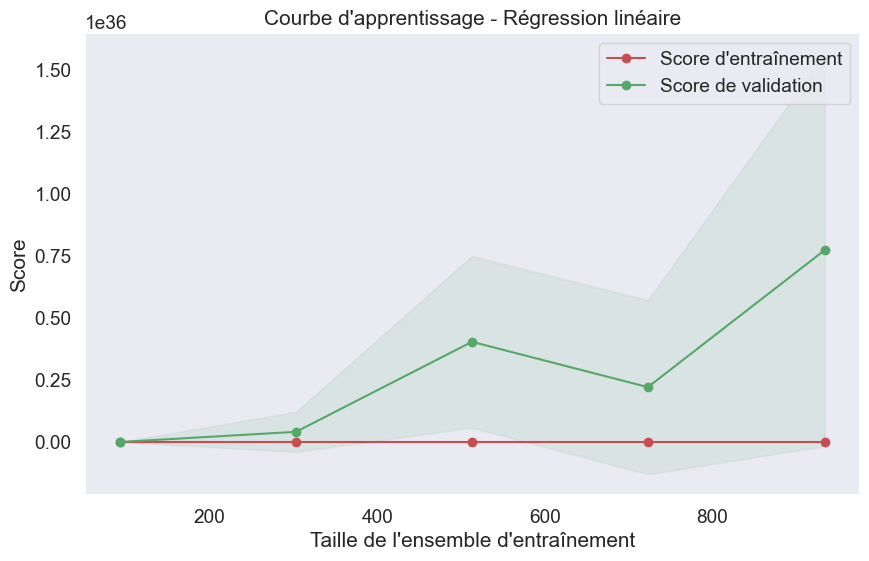

In [60]:
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor
# Définir une fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Score de validation")

    plt.legend(loc="best")
    return plt
model_xgboost = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10)

# Définir les titres pour chaque modèle
title_xgboost = "Courbe d'apprentissage - XGBoost"
title_randomforest = "Courbe d'apprentissage - RandomForestRegressor"
title_linear_regression = "Courbe d'apprentissage - Régression linéaire"

# Tracer les courbes d'apprentissage pour chaque modèle
plot_learning_curve(model_xgboost, title_xgboost, X_train, Y_train, cv=5, n_jobs=-1)
plot_learning_curve(regr, title_randomforest, X_train, Y_train, cv=5, n_jobs=-1)
plot_learning_curve(model, title_linear_regression, X_train_scaled, Y_train, cv=5, n_jobs=-1)

plt.show()


In [57]:
df_final_test.shape

(1459, 215)

In [58]:
random_forest_test_predictions.shape

(1459,)